In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib import colormaps as cm
import os
import glob
import gaitFunctions
from gaitFunctions import swingTimingProportions
from scipy import stats
import seaborn as sns

def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

In [2]:
# plot colors and parameters
axis_fontsize=11
tick_fontsize=9

# colors for step kinematics
stance_color = '#5656ff'
swing_color = '#e1e813'
duty_color = '#4d4d4d'
ipsi_color = 'tab:red'
contra_color = 'tab:green'

# colors for legs
first_pair_color = '#bc272d' # red
first_pair_color_alt = '#f77276' # salmon
second_pair_color = '#50a9d4' # teal
second_pair_color_alt = '#95bbfc' # sky blue
third_pair_color = '#fa9805' # orange
third_pair_color_alt = '#e9c716' # gold
rear_leg_color = '#703391'# violet
rear_leg_color_alt = '#0000a2' # indigo

# scatter marker size and alpha
marker_size = 10
marker_alpha = 0.7
marker_color = 'k'

In [3]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/analyses_summaries')
xl_files = sorted(glob.glob('*.xlsx'))
excel_file = gaitFunctions.selectOneFromList(xl_files)

# load the step_timing data into a dataframe
step_df = pd.read_excel(excel_file, sheet_name='step_timing', index_col=None)
step_df.head(3)


Choose from this list : 
1: 50_exemplaris_2024-02-14.xlsx
2: 80_exemplaris_2024-03-14.xlsx
3: 8Mar_exemplaris_2024-03-14.xlsx
4: all_exemplaris_2024-03-14.xlsx
5: misc_oldclip_exemplaris_2024-03-11.xlsx
6: path_summaries.xlsx
7: step_summaries.xlsx

Which ONE would you like? 4

You chose all_exemplaris_2024-03-14.xlsx



,legID,DownTime,UpTime,stance,swing,gait,duty,midSwingTime,L1_mid_swings,R1_mid_swings,...,anterior_offsets,contralateral_offsets,metachronal_lag,mcl_LR_ratio,L3_bearing_change,clip,treatment,individual,date,uniq_id
0,L1,0.272,1.151,0.879,0.242,1.121,0.7841,1.2720,L1:0.8921,R1:,...,NaN,0.667,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
1,L1,1.393,2.606,1.213,0.303,1.516,0.8001,2.7575,L1:0.9001,R1:0.3701,...,NaN,1.030,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
2,L1,2.909,4.090,1.181,0.334,1.515,0.7795,4.2570,L1:0.8898,R1:0.5597,...,NaN,0.879,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris


# leg relationships and colors

In [4]:
first_pair = ['L1','R1']
second_pair = ['L2','R2']
third_pair = ['L3','R3']
fourth_pair = ['L4','R4']
rear_legs = fourth_pair
lateral_legs = third_pair + second_pair + first_pair
ipsi_offset_legs = third_pair + second_pair
left_laterals = [x[0] for x in [third_pair, second_pair, first_pair]]
right_laterals = [x[1] for x in [third_pair, second_pair, first_pair]]
all_legs = rear_legs + lateral_legs
left_legs = [x[0] for x in [fourth_pair, third_pair, second_pair, first_pair]]
right_legs = [x[1] for x in [fourth_pair, third_pair, second_pair, first_pair]]
single_leg = ['R4']

# dictionaries of inter-leg relationships
ipsi_legs = {'L4':'L3','R4':'R3','L3':'L2','L2':'L1','R3':'R2','R2':'R1'}
contra_legs = {'L4':'R4','R4':'L4','L3':'R3','L2':'R2','R3':'L3','R2':'L2','L1':'R1','R1':'L1'}

# colors
all_leg_color = 'dimgrey'
L2_L1_color =   second_pair_color
L3_L2_color =   third_pair_color
R2_R1_color =   second_pair_color_alt
R3_R2_color =   third_pair_color_alt

# Suppression of simultaneous ipsilateral swings

### Nirody Figure 4A 

All Legs: 3896 steps
L2 : 979 steps
L3 : 962 steps
R2 : 993 steps
R3 : 962 steps


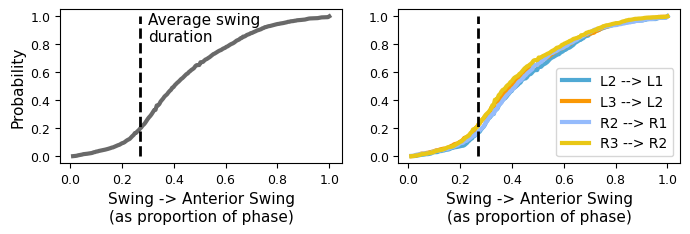

In [5]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(8,2), sharex = True)

proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg])

swing_averages = np.mean(step_df[step_df.legID.isin(ipsi_offset_legs)].swing.values)
    
# plot cumulative probability
H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')
print('All Legs:', len(proportions), 'steps')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
# ax.yaxis.label.set_size(14)

### Individual Legs
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
ypos = 1
swing_averages = np.mean(step_df[step_df.legID.isin(ipsi_offset_legs)].swing.values)
for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax1.set_ylabel('Probability',fontsize=axis_fontsize)
ax1.text(swing_averages+0.03, 0.82,'Average swing\nduration', fontsize=axis_fontsize)
ax2.legend()
for ax in [ax1,ax2]:
    ax.plot([swing_averages,swing_averages],[0,1],'--k', linewidth=2)
    ax.set_xlabel('Swing -> Anterior Swing\n(as proportion of phase)',fontsize=axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

# Initiation of anterior swing at touch-down
### Nirody Figure 4B 

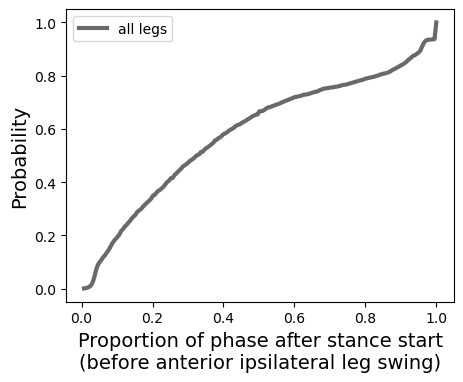

In [6]:
proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg], 'stanceswing')

fig,ax = plt.subplots(1,1,figsize=(5,3.8))

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)   
ax.legend()
plt.show()

## Initiation of anterior swing at touch-down: Individual Legs
### Nirody Figure 4B Inset

L2 : 858 steps
L3 : 861 steps
R2 : 862 steps
R3 : 847 steps


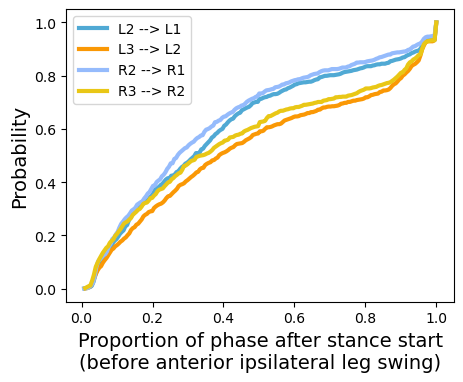

In [7]:
f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
ypos = 1

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, 
                                                          comp[0], comp[1], 'stanceswing')
  
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))

#     ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                       stat='probability',line_kws={'linewidth':3}, legend=True,
#                       color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
    
#     # klugey legend
#     plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
#     plt.text(0.1,ypos-0.01, ' --> '.join(comp),fontsize=12)
#     ypos -= 0.06
    
    print(comp[0], ':', len(proportions), 'steps')
ax.legend()
plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)   
plt.show()

## Initiation of anterior swing at touch-down
### Nirody Figure 4B ... but adjust x-axis to start just BEFORE stance

All Legs: 3428 steps
L2 : 858 steps
L3 : 861 steps
R2 : 862 steps
R3 : 847 steps


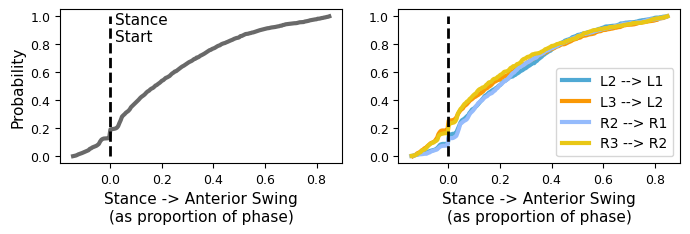

In [8]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(8,2), sharex = True)

proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg], 'stanceswing')

# ==========> offset x axis to just before stance start <==========
threshold = 0.85
proportions = [x if x<=threshold else x-1 for x in proportions]

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')
print('All Legs:', len(proportions), 'steps')
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars

### Individual legs
for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, 
                                                          comp[0], comp[1], 'stanceswing')
    
    proportions = [x if x<=threshold else x-1 for x in proportions]
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax1.text(0.02,0.82,'Stance\nStart',fontsize=axis_fontsize)
ax1.set_ylabel('Probability',fontsize=axis_fontsize)
ax2.legend()
for ax in [ax1,ax2]:
    ax.set_xlabel('Stance -> Anterior Swing\n(as proportion of phase)',fontsize=axis_fontsize)
    ax.plot([0,0],[0,1],'--k',linewidth=2)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)   

plt.show()

# Suppression of simultaneous CONTRALATERAL swings
### Nirody Figure S6 C

L3 : 945 steps
L2 : 939 steps
L1 : 985 steps


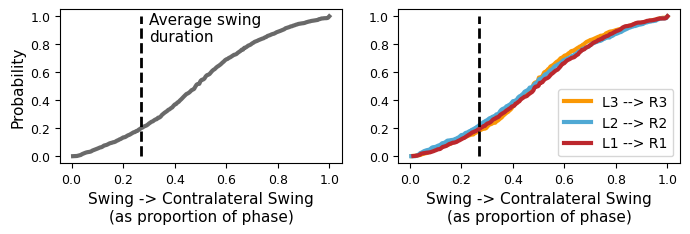

In [9]:
# S6 C
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(8,2),sharex=True)

proportions = []
speeds = []
offsets = []
for leg in left_laterals:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, leg, contra_legs[leg])

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars

leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [third_pair_color,second_pair_color,first_pair_color]

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax1.set_ylabel('Probability',fontsize=axis_fontsize)
ax1.text(swing_averages+0.03, 0.82,'Average swing\nduration', fontsize=axis_fontsize)
ax2.legend()
for ax in [ax1,ax2]:
    ax.plot([swing_averages,swing_averages],[0,1],'--k', linewidth=2)
    ax.set_xlabel('Swing -> Contralateral Swing\n(as proportion of phase)',fontsize=axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

# Proportion of phase after STANCE start for CONTRALATERAL leg swing
### Nirody Figure S6 D

L3 : 873 steps
L2 : 887 steps
L1 : 902 steps


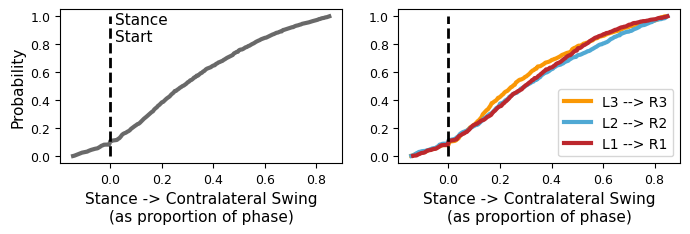

In [10]:
# S6 D
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(8,2))

proportions = []
speeds = []
offsets = []
for leg in left_laterals:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, leg, contra_legs[leg], 'stanceswing')

# ==========> offset x axis to just before stance start <==========
threshold = 0.85
proportions = [x if x<=threshold else x-1 for x in proportions]    

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars

leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [third_pair_color, second_pair_color, first_pair_color]

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                             step_df, comp[0], comp[1], 'stanceswing')
    proportions = [x if x<=threshold else x-1 for x in proportions]  
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax1.text(0.02,0.82,'Stance\nStart',fontsize=axis_fontsize)
ax1.set_ylabel('Probability',fontsize=axis_fontsize)
ax2.legend()
for ax in [ax1,ax2]:
    ax.set_xlabel('Stance -> Contralateral Swing\n(as proportion of phase)',fontsize=axis_fontsize)
    ax.plot([0,0],[0,1],'--k',linewidth=2)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)   
    
plt.show()

# Which legs tend to swing together?
* For each leg: a 4x2 matrix showing % of swings with all other legs. 
* Within the reference leg itself, report % swinging alone

In [11]:
# load data from data_file
swing_df = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
print(swing_df.columns) 
swing_df.head(3)

Index(['frametimes', 'speed (mm/s)', 'speed (bodylength/s)', 'gaits_lateral',
       'swinging_lateral', 'gaits_rear', 'swinging_rear',
       'tetrapod_coordination', 'tetrapod_speed', 'tripod_coordination',
       'tripod_speed', 'clip', 'treatment', 'individual', 'date', 'uniq_id'],
      dtype='object')


,frametimes,speed (mm/s),speed (bodylength/s),gaits_lateral,swinging_lateral,gaits_rear,swinging_rear,tetrapod_coordination,tetrapod_speed,tripod_coordination,tripod_speed,clip,treatment,individual,date,uniq_id
0,0.0303,0.045143,0.171263,pentapod,L1,step,R4,NaN,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
1,0.0606,0.046496,0.176394,pentapod,L1,step,R4,NaN,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
2,0.0909,0.047800,0.181342,pentapod,L1,step,R4,NaN,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris


In [12]:
# how many frames are we looking at?
lateral_swings = swing_df['swinging_lateral'].values
rear_swings = swing_df['swinging_rear'].values
print(len(lateral_swings))

39724


In [13]:
# For each leg, get counts of the other legs that are swinging during each frame

leg_counts = {} # key = [ref_leg][other_leg]; val = count for that combo
total_swings = {} # key = leg; val = number of total swings for that leg
legs = ['L1','R1','L2','R2','L3','R3','L4','R4']
for leg in legs:
    leg_counts[leg] = {}
    total_swings[leg] = 0
for ref_leg in leg_counts.keys():
    for leg in legs:
        leg_counts[ref_leg][leg] = 0
# print(leg_counts) # testing OK        

for i,lateral_combo in enumerate(lateral_swings):
    rear_combo = rear_swings[i]
    swinging_legs = []
    if lateral_combo is not np.nan:
        swinging_legs.extend(lateral_combo.split('_'))
    if rear_combo is not np.nan:
        swinging_legs.extend(rear_combo.split('_'))
    
#     print(swinging_legs) # testing OK
    
    if len(swinging_legs) == 1: # only one leg swinging!
        solo_swinger = swinging_legs[0]
        leg_counts[solo_swinger][solo_swinger] += 1
        total_swings[solo_swinger] += 1
    else:
        for ref_leg in swinging_legs:
            total_swings[ref_leg] += 1
            for other_leg in swinging_legs:
                if other_leg != ref_leg:
                    leg_counts[ref_leg][other_leg] += 1
test_leg = 'R2'
print('Swing counts for ', test_leg, leg_counts[test_leg])
print('Total swings for all legs\n', total_swings)

Swing counts for  R2 {'L1': 3272, 'R1': 227, 'L2': 1707, 'R2': 401, 'L3': 3268, 'R3': 651, 'L4': 3667, 'R4': 6096}
Total swings for all legs
 {'L1': 9561, 'R1': 9517, 'L2': 10486, 'R2': 10236, 'L3': 11355, 'R3': 11112, 'L4': 17537, 'R4': 17303}


Proportions for L2:

[[0.02822811 0.28867061]
 [0.0356666  0.16278848]
 [0.07438489 0.33911883]
 [0.59603281 0.35828724]]
boundaries:  [0.   0.25 0.5  0.75 1.  ]
showing:
[[0.125 0.375]
 [0.125 0.125]
 [0.125 0.375]
 [0.625 0.375]]


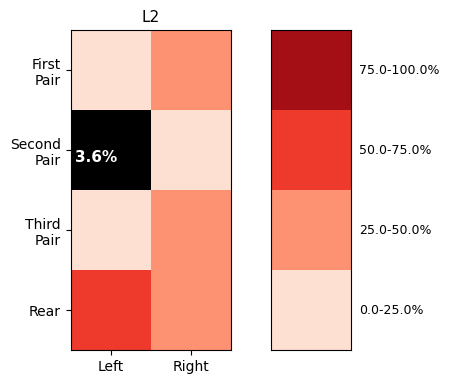

In [14]:
# Functions to make plots

def showSwingCorrelations(ax, leg_to_plot, leg_counts, color_map, num_bins = 1, print_report = False):
    
    cmap = cm.get_cmap(color_map)
    
    # set leg order
    legs = ['L1','R1','L2','R2','L3','R3','L4','R4']
    loc_indices = []
    num_rows = len(legs)/2
    num_cols = len(legs)/num_rows
    for row in np.arange(num_rows):
        for col in np.arange(num_cols):
            loc_indices.append([int(col),-int(row)])
    locs_for_legs = dict(zip(legs, loc_indices))
    
    # convert leg_counts to leg_proportions
    leg_proportions = {}
    for leg in legs:
        leg_proportions[leg] = {}
    
    for ref_leg in legs:
        for other_leg in legs:
            leg_proportions[ref_leg][other_leg] = leg_counts[ref_leg][other_leg] / total_swings[ref_leg]
    
    # get proportion matrix for leg_to_plot
    proportion_matrix = np.array([leg_proportions[leg_to_plot][leg] for leg in legs])
    
    # print out some info if print_report is True
    if print_report:
        print('Proportions for ' + leg_to_plot + ':\n')
        print(proportion_matrix.reshape([4,2]))

    # if num_bins is greater than 1, we will show proportions divided into bins
    # if num_bins is 0 or 1, we will show raw proportions 
    if num_bins <= 1:
        to_show = proportion_matrix
    else:
        proportion_boundaries = np.linspace(0,1,num_bins+1)
        proportion_bins = np.zeros(len(proportion_matrix))
        for i, proportion in enumerate(proportion_matrix):
            for j, bin in enumerate(proportion_boundaries[:-1]):
                if proportion_boundaries[j] < proportion and proportion <= proportion_boundaries[j+1]:
                    proportion_bins[i] = np.mean([proportion_boundaries[j],proportion_boundaries[j+1]])
        to_show = proportion_bins

    # go through to_show and make a rectangle (KLUGEY) of appropriate color    
    for i,leg in enumerate(legs):
        [x,y] = locs_for_legs[leg]        
        rectLowerLeftx = x-0.5
        rectLowerLefty = y-0.5
        if leg == leg_to_plot:
            rect_color = 'k'
        else:
            rect_color = cmap(to_show[i])
        rect = patches.Rectangle((rectLowerLeftx,rectLowerLefty),1,1,facecolor=rect_color)
        ax.add_patch(rect)

    # in box for leg_to_plot, write in the percentage swinging alone
    
    swinging_alone = leg_proportions[leg_to_plot][leg_to_plot]
    perc = str(np.round(swinging_alone * 100,1)) + '%'
    
    [textx, texty] = locs_for_legs[leg_to_plot]
#     print(leg_to_plot, texty, textx) # testing OK
    
    xbuff = 0.45
    ybuff = 0.15
    
    ax.text(textx-xbuff, texty-ybuff, perc, color='w', fontsize=axis_fontsize, fontweight='bold')
    
    if print_report:
        print('boundaries: ', proportion_boundaries)
        print('showing:')
        print(to_show.reshape([4,2]))

    ax.set_title(leg_to_plot, fontsize=axis_fontsize)
    ax.set_yticks(np.arange(-num_rows+1,1))
    ax.set_yticklabels(['Rear','Third\nPair','Second\nPair','First\nPair'])
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Left','Right'])
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([-num_rows+0.5,0.5])
    
    return ax

# homemade legend for these!
def makeLegendForColorBins(ax, num_bins, color_map):

    cmap = cm.get_cmap(color_map)
    proportion_boundaries = np.linspace(0,1,num_bins+1)
    plot_levels = np.zeros(num_bins)
    labels = []
    cols = []
    for i, level in enumerate(proportion_boundaries[:-1]):
        lower_boundary = np.round(proportion_boundaries[i],2)
        upper_boundary = np.round(proportion_boundaries[i+1],2)
        mid_point = np.mean([lower_boundary, upper_boundary])
        plot_levels[i] = mid_point
        labels.append(str(np.round(lower_boundary*100,1)) + '-' + str(np.round(upper_boundary*100,1)) + '%')
        cols.append(cmap(mid_point))
    
    ax.set_ylim([0,num_bins])
    ax.set_xlim([0,1])
    for i, label in enumerate(labels):
        ax.text(1.1, 0.45+i, label, fontsize=tick_fontsize)
        llx = 0
        lly = i
        rect = patches.Rectangle((llx,lly),1,1,facecolor=cols[i])
        ax.add_patch(rect)
    
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

f = plt.figure(figsize=(4,4))
leg_to_plot = 'L2'
num_bins = 4
cmap = 'Reds'
ax1 = f.add_axes([0.1,0.1,0.4,0.8])
ax1 = showSwingCorrelations(ax1, leg_to_plot, leg_counts, cmap, num_bins, True)
ax2 = f.add_axes([0.6, 0.1, 0.2, 0.8])
ax2 = makeLegendForColorBins(ax2, num_bins, cmap)
plt.show()

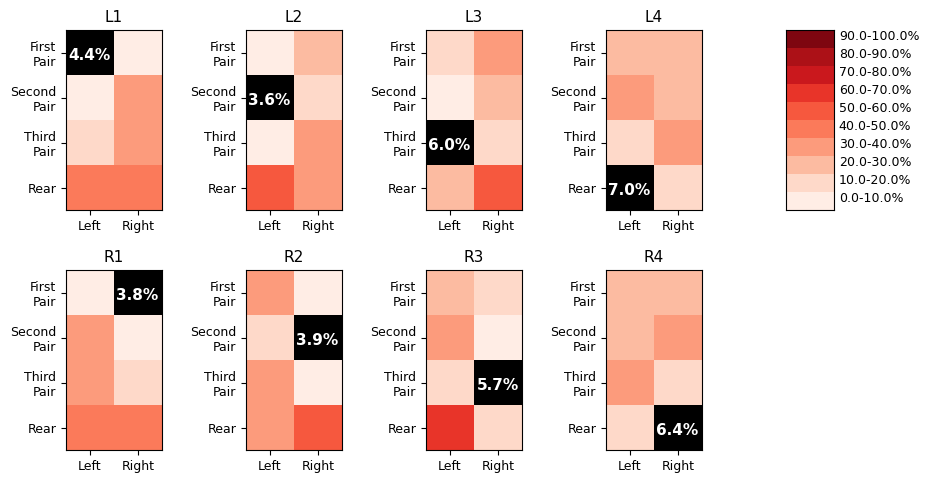

In [15]:
# Show all the legs on a single plot
num_bins = 10
cmap = 'Reds'

f = plt.figure(figsize=(12,6))

lefta = [0.1, 0.25, 0.4, 0.55]
bottoma = 0.1
mida = 0.5
a_width = 0.08
a_height = 0.3

a1 = f.add_axes([lefta[0], mida, a_width, a_height])
a2 = f.add_axes([lefta[1], mida, a_width, a_height])
a3 = f.add_axes([lefta[2], mida, a_width, a_height])
a4 = f.add_axes([lefta[3], mida, a_width, a_height])
a5 = f.add_axes([lefta[0], bottoma, a_width, a_height])
a6 = f.add_axes([lefta[1], bottoma, a_width, a_height])
a7 = f.add_axes([lefta[2], bottoma, a_width, a_height])
a8 = f.add_axes([lefta[3], bottoma, a_width, a_height])

leg_order_to_plot = ['L1','L2','L3','L4','R1','R2','R3','R4']
ax_list = [a1,a2,a3,a4,a5,a6,a7,a8]

for i,leg in enumerate(leg_order_to_plot):
    ax_list[i] = showSwingCorrelations(ax_list[i], leg, leg_counts, cmap, num_bins)
    ax_list[i].yaxis.label.set_size(axis_fontsize)
    ax_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize) 
if num_bins > 1:
    a9 = f.add_axes([0.7, mida, 0.04, a_height])
    a9 = makeLegendForColorBins(a9, num_bins, cmap)
plt.show()

# Compare timing of REAR stance and swing with other legs

### on OPPOSITE side ... interesting? Third leg swing
Opposite third leg swings after rear swing because rear goes to stance just before opposite rear swings . . .

In [16]:
rear_avg_swings = {}
for leg in ['L4','R4']:
    rear_avg_swings[leg] = np.mean(step_df[step_df['legID']==leg].swing.values)
    print(leg,rear_avg_swings[leg])

L4 0.37436789772727275
R4 0.3694149466192171


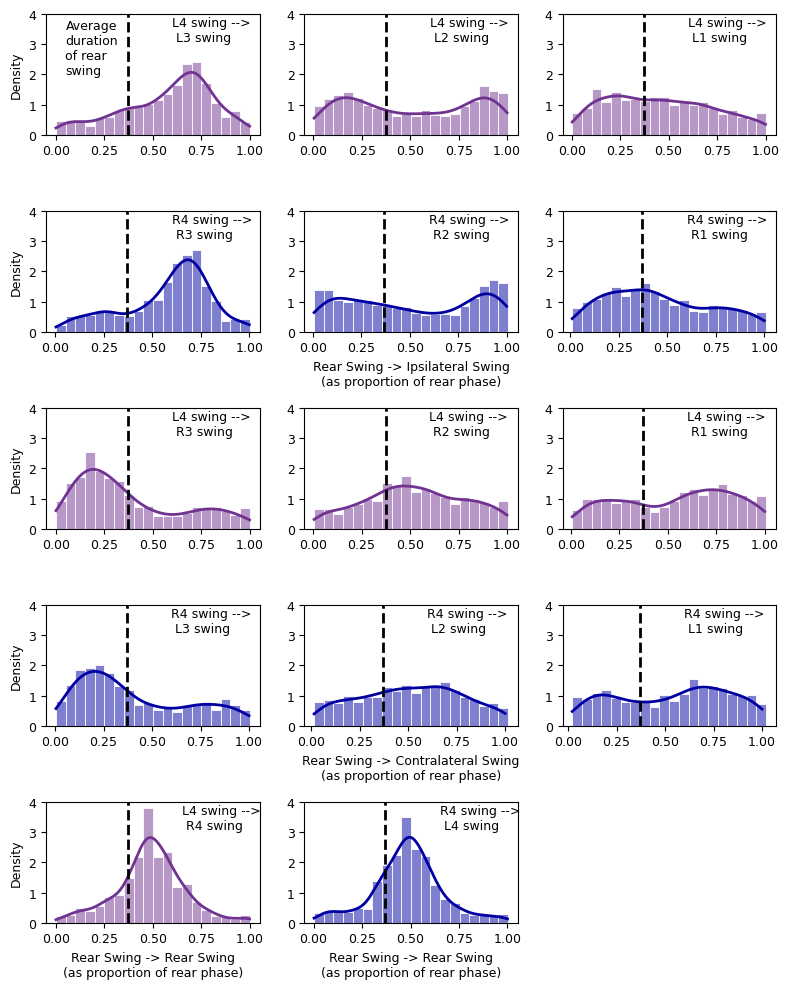

In [17]:
f,[[a1,a2,a3],[a4,a5,a6],[a7,a8,a9],[a10,a11,a12],[a13,a14,a15]] = plt.subplots(5,3, figsize=(8,10))

# comparison to IPSILATERAL anterior swings   
leg_comps = [['L4','L3'],['L4','L2'],['L4','L1'],['R4','R3'],['R4','R2'],['R4','R1']]
plot_cols = [rear_leg_color] * 3 + [rear_leg_color_alt] * 3
for i, ax in enumerate([a1,a2,a3,a4,a5,a6]):
    proportions = []
    speeds = []
    offsets = []
    offsets, offsetsproportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                                 step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.text(0.6, 3.1, s=leg_comps[i][0] + ' swing -->\n ' + leg_comps[i][1] + ' swing', fontsize=tick_fontsize)
    ax.plot([rear_avg_swings[leg_comps[i][0]], rear_avg_swings[leg_comps[i][0]]], [0,4], '--k', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_text('')
    ax.set_ylim([0,4])

# comparison to CONTRALATERAL anterior swings    
leg_comps = [['L4','R3'],['L4','R2'],['L4','R1'],['R4','L3'],['R4','L2'],['R4','L1']]
plot_cols = [rear_leg_color] * 3 + [rear_leg_color_alt] * 3
for i, ax in enumerate([a7,a8,a9,a10,a11,a12]):
    proportions = []
    speeds = []
    offsets = []
    offsets, offsetsproportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                                 step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.text(0.6, 3.1, s=leg_comps[i][0] + ' swing -->\n ' + leg_comps[i][1] + ' swing', fontsize=tick_fontsize)
    ax.plot([rear_avg_swings[leg_comps[i][0]], rear_avg_swings[leg_comps[i][0]]], [0,4], '--k', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_text('')
    ax.set_ylim([0,4])

# left-to-right swings
leg_comps = [['L4','R4'],['R4','L4']]
plot_cols = [rear_leg_color,rear_leg_color_alt]
for i, ax in enumerate([a13,a14]):
    proportions = []
    speeds = []
    offsets = []
    offsets, offsetsproportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                                 step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.text(0.65, 3.1, s=leg_comps[i][0] + ' swing -->\n ' + leg_comps[i][1] + ' swing', fontsize=tick_fontsize)
    ax.plot([rear_avg_swings[leg_comps[i][0]], rear_avg_swings[leg_comps[i][0]]], [0,4], '--k', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.set_ylim([0,4])

for ax in [a1,a4,a7,a10,a13]:
    ax.yaxis.label.set_text('Density') # cool
    ax.yaxis.label.set_size(tick_fontsize)  
    ax.xaxis.label.set_size(tick_fontsize)

a1.text(0.05,2,s='Average\nduration\nof rear\nswing',fontsize=tick_fontsize)
a5.set_xlabel('Rear Swing -> Ipsilateral Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a11.set_xlabel('Rear Swing -> Contralateral Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a13.set_xlabel('Rear Swing -> Rear Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a14.set_xlabel('Rear Swing -> Rear Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a14.set_ylabel('')

a15.set_axis_off()
plt.tight_layout()

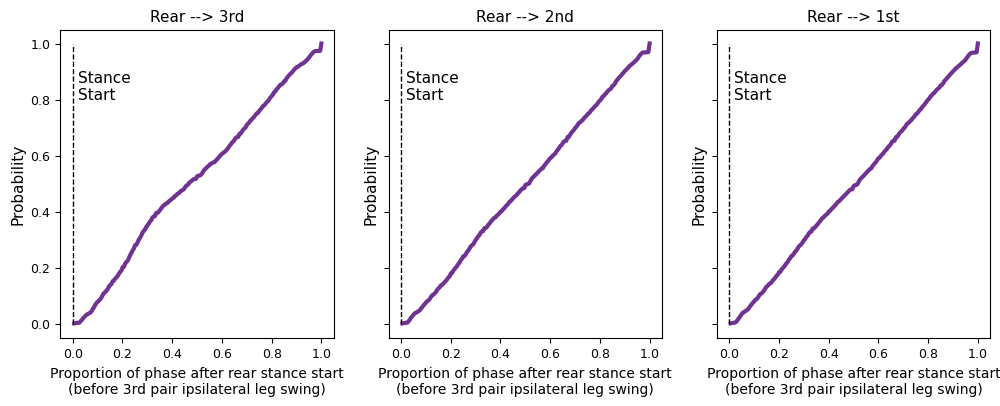

In [18]:
# Plot rear STANCES to ipsilateral (3rd pair) swings

'''
Rear step down to ipsilateral leg swing. 
Predict a strong relationship b/c rear leg tends to swing with opposite adjacent leg 
... and rear leg swings when the other rear leg gets set down
'''
proportions = []
speeds = []
offsets = []
third_ipsi = {'R4':'R3','L4':'L3'}
second_ipsi = {'R4':'R2','L4':'L2'}
first_ipsi = {'R4':'R1','L4':'L1'}
title_str = ['3rd','2nd','1st']

fig, ax_list = plt.subplots(1,3,figsize=(12,4),sharey=True)

for i, comp in enumerate([third_ipsi, second_ipsi, first_ipsi]):

    # get data for 'R4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['R4'], 'stanceswing')
    # get data for 'L4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['L4'], 'stanceswing')

    # offset x axis to just before stance start
#     threshold = 0.95
#     proportions = [x if x<=threshold else x-1 for x in proportions]

    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax_list[i].plot(X1[1:], F1, linewidth=3, color = rear_leg_color, label='rear legs')
    # ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
    #                   stat='probability',line_kws={'linewidth':5},
    #                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
    ax_list[i].set_xlabel('Proportion of phase after rear stance start\n(before 3rd pair ipsilateral leg swing)',fontsize=10)
    ax_list[i].plot([0,0],[0,1],'--k',linewidth=1)
    ax_list[i].text(0.02,0.8,'Stance\nStart',fontsize=axis_fontsize)
    ax_list[i].yaxis.label.set_size(10)
    ax_list[i].set_ylabel('Probability',fontsize=axis_fontsize)
    ax_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)  
    ax_list[i].set_title('Rear --> ' + title_str[i], fontsize=axis_fontsize)
#     ax_list[i].legend()
plt.show()

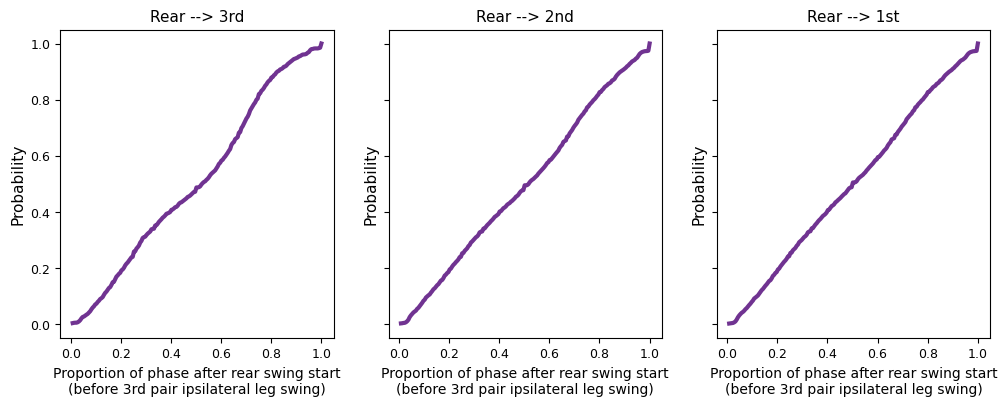

In [19]:
# Plot rear SWINGS to ipsilateral (3rd pair) swings

proportions = []
speeds = []
offsets = []
third_ipsi = {'R4':'R3','L4':'L3'}
second_ipsi = {'R4':'R2','L4':'L2'}
first_ipsi = {'R4':'R1','L4':'L1'}
title_str = ['3rd','2nd','1st']

fig, ax_list = plt.subplots(1,3,figsize=(12,4),sharey=True)

for i, comp in enumerate([third_ipsi, second_ipsi, first_ipsi]):

    # get data for 'R4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['R4'], 'swingswing')
    # get data for 'L4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['L4'], 'swingswing')

    # offset x axis to just before stance start
#     threshold = 0.95
#     proportions = [x if x<=threshold else x-1 for x in proportions]

    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax_list[i].plot(X1[1:], F1, linewidth=3, color = rear_leg_color, label='rear legs')
    # ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
    #                   stat='probability',line_kws={'linewidth':5},
    #                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
    ax_list[i].set_xlabel('Proportion of phase after rear swing start\n(before 3rd pair ipsilateral leg swing)',fontsize=10)
    # plot timing of event shown
    # ax_list[i].plot([0,0],[0,1],'--k',linewidth=1)
    # ax_list[i].text(0.02,0.8,'Swing\nStart',fontsize=14)
    ax_list[i].yaxis.label.set_size(10)
    ax_list[i].set_ylabel('Probability',fontsize=axis_fontsize)
    ax_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)  
    ax_list[i].set_title('Rear --> ' + title_str[i], fontsize=axis_fontsize)
#     ax_list[i].legend()
plt.show()